# Import Data

In [899]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from prettytable import PrettyTable as pt
from numpy import mean
from numpy import std
from numpy import absolute
sns.set(style="darkgrid")
plt.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [900]:
import warnings 
warnings.filterwarnings('ignore')

# Data PreProcess + Concatination

## Data Concatination

In [901]:
df = pd.concat(map(pd.read_csv,glob.glob('./datasets/*.csv')))
display(df)

,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh,pencapaian_Waktu_tempuh
0,pagi,Selatan - Pusat,Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...,21.0,19.62,56.06,22.77,24.36,58.82,NaN
1,pagi,Selatan - Pusat,Cilandak KKO - Warung Buncit - Mampang Prapata...,21.0,13.36,38.17,24.14,24.36,36.88,NaN
2,pagi,Selatan - Pusat,Pangeran Antasari - Prapanca - Iskandarsyah - ...,21.0,11.13,31.80,29.64,24.36,25.99,NaN
3,pagi,Selatan - Pusat,Pondok Labu - Fatmawati - Panglima Polim - Sis...,21.0,16.25,46.43,25.82,24.36,44.35,NaN
4,pagi,Selatan - Pusat,Pasar Jumat - Metro Pondok Indah - Iskandar Mu...,21.0,15.87,45.34,28.18,24.36,37.33,NaN
...,...,...,...,...,...,...,...,...,...,...
77,sore,Pusat - Utara,Letjend. Suprapto - Yos Sudarso - Bollevard Ba...,21.0,20.29,57.97,22.03,23.02,56.04,NaN
78,sore,Pusat - Barat,Hayam Wuruk - Hasyim Ashari - Kyai Tapa - Daan...,21.0,14.47,41.34,20.79,21.11,45.71,NaN
79,sore,Pusat - Barat,Hayam Wuruk - Balikpapan - Tomang Raya - S. Pa...,21.0,15.55,44.43,17.91,21.11,55.19,NaN
80,sore,Pusat - Barat,Kebon Sirih - Jatibaru - Katamso - Kemanggisan...,21.0,17.43,49.80,23.41,21.11,52.63,NaN


## Drop Kolom pencapain_Waktu_tempuh

<p style="font-size:20px"><strong>91.684</strong> % dari kolom pencapaian_Waktu_tempuh adalah data kosong sehingga saya memutuskan untuk mendrop saja kolom ini</p>

In [902]:
dataRow = df.shape[0]
nullPencapainWaktuTempuh = df['pencapaian_Waktu_tempuh'].isnull().sum()
print(f'Dataframe memiliki {dataRow} baris')
print(f'Kolom pencapain_Waktu_tempuh memiliki {nullPencapainWaktuTempuh} baris yang NaN')
print(f'{round(((nullPencapainWaktuTempuh/dataRow)*100),3)} % dari kolom pencapain_Waktu_tempuh adalah data Nan')

Dataframe memiliki 986 baris
Kolom pencapain_Waktu_tempuh memiliki 904 baris yang NaN
91.684 % dari kolom pencapain_Waktu_tempuh adalah data Nan


In [903]:
df.drop(['pencapaian_Waktu_tempuh'],axis=1,inplace=True)

In [904]:
dataShape = df.shape
numOfNanRows = df.isnull().sum().sum()
print(f'Shape DataFrame sebelum data NaN dihapus: {dataShape}')
print(f'Jumlah baris yang NaN adalah sebanyak {numOfNanRows} baris')
# Drop nan rows in dataframe
text = ' AFTER DROPPING NAN VALUES '
print(f'\n{text:-^50}\n')
df.dropna(inplace = True)

dataShape = df.shape
numOfNanRows = df.isnull().sum().sum()
print(f'Shape DataFrame stelah data NaN dihapus: {dataShape}')
print(f'Jumlah baris yang NaN adalah sebanyak {numOfNanRows} baris')

Shape DataFrame sebelum data NaN dihapus: (986, 9)
Jumlah baris yang NaN adalah sebanyak 141 baris

----------- AFTER DROPPING NAN VALUES ------------

Shape DataFrame stelah data NaN dihapus: (902, 9)
Jumlah baris yang NaN adalah sebanyak 0 baris


# Nomor 1

In [905]:
numericDfIndex = [i for i in range(len(df.dtypes)) if df.dtypes[i] == 'float64']
numericDf = df.iloc[:,numericDfIndex]
display(numericDf)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,21.0,19.62,56.06,22.77,24.36,58.82
1,21.0,13.36,38.17,24.14,24.36,36.88
2,21.0,11.13,31.80,29.64,24.36,25.99
3,21.0,16.25,46.43,25.82,24.36,44.35
4,21.0,15.87,45.34,28.18,24.36,37.33
...,...,...,...,...,...,...
77,21.0,20.29,57.97,22.03,23.02,56.04
78,21.0,14.47,41.34,20.79,21.11,45.71
79,21.0,15.55,44.43,17.91,21.11,55.19
80,21.0,17.43,49.80,23.41,21.11,52.63


In [906]:
numericDf.isnull().sum().sum()

0

In [907]:
model = LinearRegression()

In [908]:
def crossValMAE(model:object,df_param,random_state=42):
    X = df_param.drop(['pencapaian_kecepatan'],axis=1)
    y = df_param['pencapaian_kecepatan']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    folds = KFold(n_splits = 10, shuffle = True, random_state = random_state)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=folds,n_jobs=-1)
    meanScores = round(mean(absolute(scores)),3)
    meanStd = round(scores.std(),3)
    model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    mae = round(mean_absolute_error(y_test,y_hat),3)
    return meanScores,meanStd,mae

def displayCrossValResults(maeMean,maeStd,mae,optional_param = None):
    if optional_param is None:
        print(f'Cross Val MAE Mean = {maeMean}')
        print(f'Cross Val MAE Std = {maeStd}')
        print(f'Non Cross Val MAE = {mae}')
    else:
        print(f'Cross Val MAE Mean after {optional_param} = {maeMean}')
        print(f'Cross Val MAE Std after {optional_param} = {maeStd}')
        print(f'Non Cross Val MAE after {optional_param} = {mae}')

In [909]:
maeMean,maeStd,mae = crossValMAE(model,numericDf)
displayCrossValResults(maeMean,maeStd,mae)

Cross Val MAE Mean = 2.021
Cross Val MAE Std = 0.142
Non Cross Val MAE = 1.956


# Nomor 2

In [910]:
numericDfCols = numericDf.columns
maeMeanAccuracy,maeStdAccuracy, nonCrossValAccuracy = [],[],[]
def appendAccuracy(maeMean,maeStd,nonCrossVal):
    maeMeanAccuracy.append(maeMean)
    maeStdAccuracy.append(maeStd)
    nonCrossValAccuracy.append(nonCrossVal)

## Normalisasi Standarisasi dan Robust Scaler

### Normalisasi

In [911]:
scalerNormal = MinMaxScaler()
numericDfNormal = pd.DataFrame(scalerNormal.fit_transform(numericDf))
numericDfNormal.columns = numericDfCols
display(numericDfNormal)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,0.4,0.875392,0.761832,0.226399,0.348718,0.651410
1,0.4,0.384796,0.371647,0.265122,0.348718,0.335636
2,0.4,0.210031,0.232715,0.420577,0.348718,0.178900
3,0.4,0.611285,0.551799,0.312606,0.348718,0.443149
4,0.4,0.581505,0.528026,0.379310,0.348718,0.342113
...,...,...,...,...,...,...
897,0.4,0.927900,0.803490,0.205483,0.286247,0.611399
898,0.4,0.471787,0.440785,0.170435,0.197203,0.462723
899,0.4,0.556426,0.508179,0.089033,0.197203,0.599165
900,0.4,0.703762,0.625300,0.244488,0.197203,0.562320


### Normalisasi Histogram

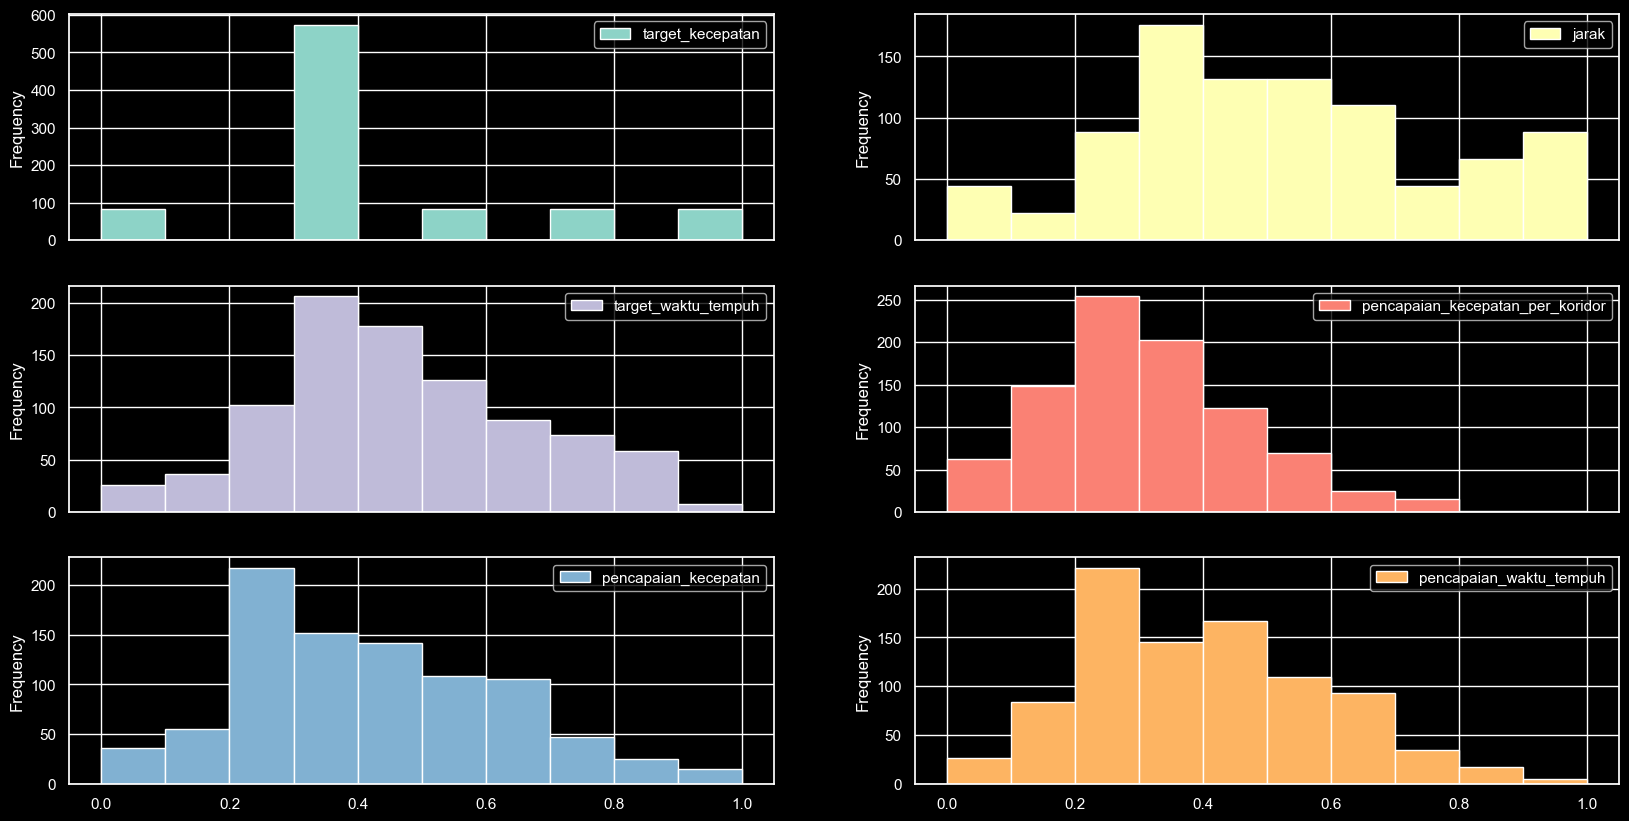

In [912]:
numericDfNormal.plot.hist(subplots=True, legend=True, layout=(3, 2))
plt.show()

### Standarisasi

In [913]:
scalerStd = StandardScaler()
numericDfStandard = pd.DataFrame(scalerStd.fit_transform(numericDf))
numericDfStandard.columns = numericDfCols
display(numericDfStandard)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,-0.176777,1.511478,1.493912,-0.568058,-0.354530,1.334832
1,-0.176777,-0.549380,-0.496373,-0.318890,-0.354530,-0.347336
2,-0.176777,-1.283520,-1.205044,0.681421,-0.354530,-1.182287
3,-0.176777,0.402038,0.422562,-0.013340,-0.354530,0.225398
4,-0.176777,0.276938,0.301299,0.415884,-0.354530,-0.312834
...,...,...,...,...,...,...
897,-0.176777,1.732049,1.706402,-0.702645,-0.664223,1.121686
898,-0.176777,-0.183956,-0.143707,-0.928170,-1.105651,0.329671
899,-0.176777,0.171591,0.200060,-1.451969,-1.105651,1.056515
900,-0.176777,0.790507,0.797479,-0.451658,-1.105651,0.860237


### Standarisasi Histogram

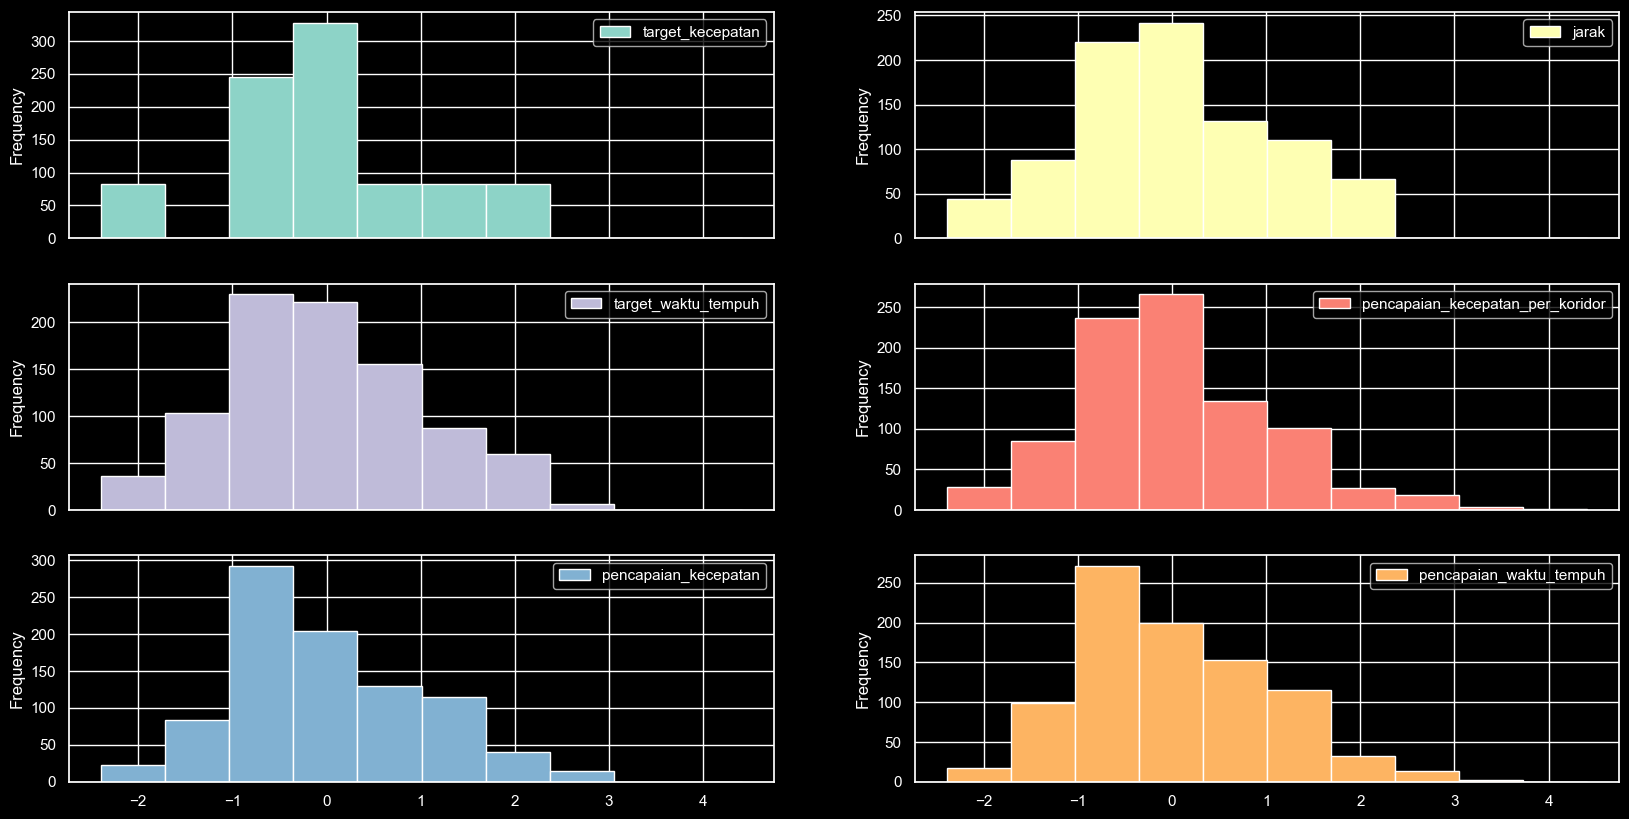

In [914]:
numericDfStandard.plot.hist(subplots=True, legend=True, layout=(3, 2))
plt.show()

### Robust Scaler

In [915]:
scalerRobust = RobustScaler()
numericDfRobust = pd.DataFrame(scalerRobust.fit_transform(numericDf))
numericDfRobust.columns = numericDfCols
display(numericDfRobust)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,0.0,1.262755,1.167084,-0.341113,-0.147249,0.981659
1,0.0,-0.334184,-0.327485,-0.144345,-0.147249,-0.184742
2,0.0,-0.903061,-0.859649,0.645601,-0.147249,-0.763690
3,0.0,0.403061,0.362573,0.096948,-0.147249,0.212387
4,0.0,0.306122,0.271512,0.435907,-0.147249,-0.160819
...,...,...,...,...,...,...
897,0.0,1.433673,1.326650,-0.447397,-0.350664,0.833865
898,0.0,-0.051020,-0.062657,-0.625494,-0.640607,0.284689
899,0.0,0.224490,0.195489,-1.039138,-0.640607,0.788676
900,0.0,0.704082,0.644110,-0.249192,-0.640607,0.652578


### Robust Histogram

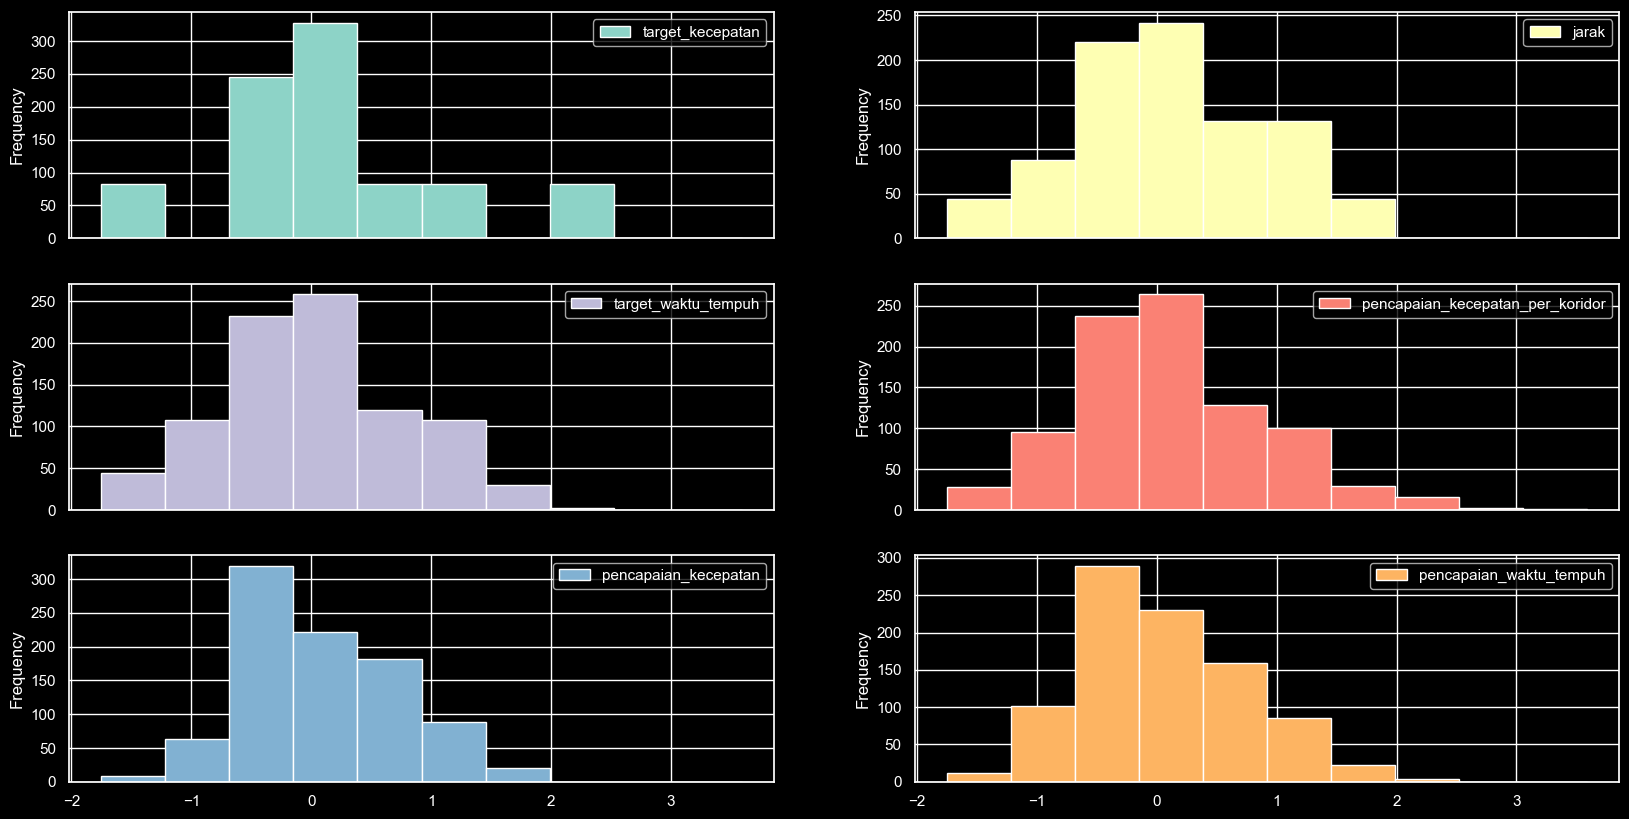

In [916]:
numericDfRobust.plot.hist(subplots=True, legend=True, layout=(3, 2))
plt.show()

## Akurasi Model Setiap Metode Transformasi

### Akurasi Normalisasi

In [917]:
meanMaeNormal,stdMaeNormal,maeNormal = crossValMAE(model,numericDfNormal)
displayCrossValResults(meanMaeNormal,stdMaeNormal,maeNormal,'normalization')
appendAccuracy(meanMaeNormal,stdMaeNormal,maeNormal)

Cross Val MAE Mean after normalization = 0.094
Cross Val MAE Std after normalization = 0.007
Non Cross Val MAE after normalization = 0.091


### Akurasi Standarisasi

In [918]:
meanMaeStandard,stdMaeStandard,maeStandard = crossValMAE(model,numericDfStandard)
displayCrossValResults(meanMaeStandard,stdMaeStandard,maeStandard,'standarization')
appendAccuracy(meanMaeStandard,stdMaeStandard,maeStandard)

Cross Val MAE Mean after standarization = 0.467
Cross Val MAE Std after standarization = 0.033
Non Cross Val MAE after standarization = 0.452


### Akurasi Robust Scaler

In [919]:
meanMaeRobust,stdMaeRobust,maeRobust = crossValMAE(model,numericDfRobust)
displayCrossValResults(meanMaeRobust,stdMaeRobust,maeRobust,'robust')
appendAccuracy(meanMaeRobust,stdMaeRobust,maeRobust)

Cross Val MAE Mean after robust = 0.307
Cross Val MAE Std after robust = 0.022
Non Cross Val MAE after robust = 0.297


## Tabel Akurasi

In [920]:
def makeTable(maeMeanAccuracy,maeStdAccuracy, nonCrossValAccuracy,transformations = ['Normalization','Standarization','Robust']):
    comparisonTable = pt()
    comparisonTable.title = f'Tabel Komparasi Akurasi Normalisasi, Standarisasi, dan Robust'
    comparisonTable.field_names = ["No","Metode Transformasi","Cross Val MAE Mean","Cross Val MAE Std","Non Cross Val MAE"]
    n = len(maeMeanAccuracy)
    for i in range(n): comparisonTable.add_row((i+1,transformations[i],maeMeanAccuracy[i],maeStdAccuracy[i],nonCrossValAccuracy[i]))
    return comparisonTable

In [921]:
tabel = makeTable(maeMeanAccuracy,maeStdAccuracy, nonCrossValAccuracy)
print(tabel)

+---------------------------------------------------------------------------------------+
|             Tabel Komparasi Akurasi Normalisasi, Standarisasi, dan Robust             |
+----+---------------------+--------------------+-------------------+-------------------+
| No | Metode Transformasi | Cross Val MAE Mean | Cross Val MAE Std | Non Cross Val MAE |
+----+---------------------+--------------------+-------------------+-------------------+
| 1  |    Normalization    |       0.094        |       0.007       |       0.091       |
| 2  |    Standarization   |       0.467        |       0.033       |       0.452       |
| 3  |        Robust       |       0.307        |       0.022       |       0.297       |
+----+---------------------+--------------------+-------------------+-------------------+


# Nomor 3

In [922]:
categoricalDfIndex = [i for i in range(len(df.dtypes)) if df.dtypes[i] == 'object']
categoricalDf = df.iloc[:,categoricalDfIndex]
categoricalDf['pencapaian_kecepatan'] = df['pencapaian_kecepatan']
display(categoricalDf)

,waktu,arah,koridor,pencapaian_kecepatan
0,pagi,Selatan - Pusat,Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...,24.36
1,pagi,Selatan - Pusat,Cilandak KKO - Warung Buncit - Mampang Prapata...,24.36
2,pagi,Selatan - Pusat,Pangeran Antasari - Prapanca - Iskandarsyah - ...,24.36
3,pagi,Selatan - Pusat,Pondok Labu - Fatmawati - Panglima Polim - Sis...,24.36
4,pagi,Selatan - Pusat,Pasar Jumat - Metro Pondok Indah - Iskandar Mu...,24.36
...,...,...,...,...
77,sore,Pusat - Utara,Letjend. Suprapto - Yos Sudarso - Bollevard Ba...,23.02
78,sore,Pusat - Barat,Hayam Wuruk - Hasyim Ashari - Kyai Tapa - Daan...,21.11
79,sore,Pusat - Barat,Hayam Wuruk - Balikpapan - Tomang Raya - S. Pa...,21.11
80,sore,Pusat - Barat,Kebon Sirih - Jatibaru - Katamso - Kemanggisan...,21.11


In [923]:
categoricalDf.isnull().sum()

waktu                   0
arah                    0
koridor                 0
pencapaian_kecepatan    0
dtype: int64

In [924]:
X = categoricalDf.drop(['pencapaian_kecepatan'],axis=1)
y = categoricalDf['pencapaian_kecepatan']
labelEncoder = LabelEncoder()

## One Hot Encoder

In [925]:
def displayDfAfterOneHot(df):
    text = ' DataFrame After One Hot Encoding '
    print(f'{text:-^90}')
    display(df)

In [926]:
oneHotEncoder = OneHotEncoder(sparse=False)
categoricalDfOneHotX = pd.DataFrame(oneHotEncoder.fit_transform(X))
yAfterOneHot = pd.DataFrame(labelEncoder.fit_transform(y))
categoricalDfOneHot = categoricalDfOneHotX
categoricalDfOneHot[categoricalDfOneHot.shape[1]+1] = yAfterOneHot
displayDfAfterOneHot(categoricalDfOneHot)

---------------------------- DataFrame After One Hot Encoding ----------------------------


,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,56
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50
898,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
899,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
900,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18


## Akurasi Model

In [927]:
def crossValMAEEncoding(model:object,df_param,random_state=42):
    X = df_param.iloc[:,:-1]
    y = df_param.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    folds = KFold(n_splits = 10, shuffle = True, random_state = random_state)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=folds,n_jobs=-1)
    meanScores = round(mean(absolute(scores)),3)
    meanStd = round(scores.std(),3)
    model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    mae = round(mean_absolute_error(y_test,y_hat),3)
    return meanScores,meanStd,mae

### Akurasi Model setelah di One Hot Encoding (Categorical Data Only) 

In [928]:
meanMaeCategoryOneHot,stdMaeCategoryOneHot,maeCategoryOneHot = crossValMAEEncoding(model,categoricalDfOneHot)
displayCrossValResults(meanMaeCategoryOneHot,meanMaeCategoryOneHot,maeCategoryOneHot)

Cross Val MAE Mean = 35.728
Cross Val MAE Std = 35.728
Non Cross Val MAE = 34.124


## Ordinal Encoder

In [929]:
def displayDfAfterOrdinal(df):
    text = ' DataFrame After Ordinal Encoding '
    print(f'{text:-^90}')
    display(df)

In [930]:
ordinalEncoder = OrdinalEncoder()
categoricalDfOrdinalX = pd.DataFrame(ordinalEncoder.fit_transform(X))
yAfterOrdinal = pd.DataFrame(labelEncoder.fit_transform(y))
categoricalDfOrdinal = categoricalDfOrdinalX
categoricalDfOrdinal[categoricalDfOrdinal.shape[1]+1] = yAfterOrdinal
displayDfAfterOrdinal(categoricalDfOrdinal)

---------------------------- DataFrame After Ordinal Encoding ----------------------------


,0,1,2,4
0,2.0,5.0,16.0,72
1,2.0,5.0,0.0,72
2,2.0,5.0,25.0,72
3,2.0,5.0,29.0,72
4,2.0,5.0,26.0,72
...,...,...,...,...
897,3.0,4.0,17.0,50
898,3.0,1.0,5.0,18
899,3.0,1.0,4.0,18
900,3.0,1.0,13.0,18


In [931]:
meanMaeCategoryOrdinal,stdMaeCategoryOrdinal,maeCategoryOrdinal = crossValMAEEncoding(model,categoricalDfOrdinal)
displayCrossValResults(meanMaeCategoryOrdinal,meanMaeCategoryOrdinal,maeCategoryOrdinal)

Cross Val MAE Mean = 38.817
Cross Val MAE Std = 38.817
Non Cross Val MAE = 38.312
